In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('Ventas(1).csv')
df

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


In [1]:
import sklearn
print(sklearn.__version__)


1.6.1


1_Preparacion de datos

In [4]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day
df['Día_semana'] = df['Fecha'].dt.weekday

df

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas,Año,Mes,Día,Día_semana
0,2022-01-01,6,0,0,4033,2022,1,1,5
1,2022-01-02,7,0,1,4012,2022,1,2,6
2,2022-01-03,1,0,0,1608,2022,1,3,0
3,2022-01-04,2,1,0,2046,2022,1,4,1
4,2022-01-05,3,0,0,2484,2022,1,5,2
...,...,...,...,...,...,...,...,...,...
360,2022-12-27,2,1,0,2189,2022,12,27,1
361,2022-12-28,3,0,0,2548,2022,12,28,2
362,2022-12-29,4,0,0,3018,2022,12,29,3
363,2022-12-30,5,0,0,3591,2022,12,30,4


No nulos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
 5   Año            365 non-null    int32         
 6   Mes            365 non-null    int32         
 7   Día            365 non-null    int32         
 8   Día_semana     365 non-null    int32         
dtypes: datetime64[ns](1), int32(4), int64(4)
memory usage: 20.1 KB


Var dependientes e indep

In [6]:
#Indep
X=df.drop('Ventas',axis=1)
X = df.drop('Fecha',axis=1)
X


,DíaDeLaSemana,Promociones,Festivo,Ventas,Año,Mes,Día,Día_semana
0,6,0,0,4033,2022,1,1,5
1,7,0,1,4012,2022,1,2,6
2,1,0,0,1608,2022,1,3,0
3,2,1,0,2046,2022,1,4,1
4,3,0,0,2484,2022,1,5,2
...,...,...,...,...,...,...,...,...
360,2,1,0,2189,2022,12,27,1
361,3,0,0,2548,2022,12,28,2
362,4,0,0,3018,2022,12,29,3
363,5,0,0,3591,2022,12,30,4


In [7]:
#Dependientes
y = df['Ventas']
y

0      4033
1      4012
2      1608
3      2046
4      2484
       ... 
360    2189
361    2548
362    3018
363    3591
364    4351
Name: Ventas, Length: 365, dtype: int64

2_Dividimos el conj de datos para prueba y entrenar

In [8]:
X_entrenar,X_prueba,y_entrenar,y_prueba=train_test_split(X,y,train_size=0.7,random_state=42)

In [9]:
df['Promociones'] = df['Promociones'].map({0: 'Con Promoción', 1: 'Sin Promoción'})

In [10]:
datos = df.groupby(['Festivo', 'Promociones'])['Ventas'].sum().unstack()

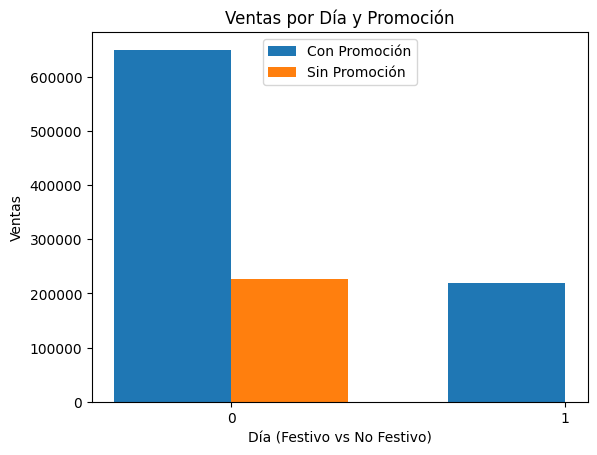

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Definir posiciones para cada grupo de días (Festivo vs No Festivo)
x = np.arange(len(datos.index))
ancho = 0.35

fig, ax = plt.subplots()

# Crear las barras para cada tipo de promoción
barras1 = ax.bar(x - ancho/2, datos['Con Promoción'], ancho, label='Con Promoción')
barras2 = ax.bar(x + ancho/2, datos['Sin Promoción'], ancho, label='Sin Promoción')

ax.set_xlabel('Día (Festivo vs No Festivo)')
ax.set_ylabel('Ventas')
ax.set_title('Ventas por Día y Promoción')
ax.set_xticks(x)
ax.set_xticklabels(datos.index)
ax.legend()

plt.show()


3_Seleccion del modelo

In [12]:
modelo = LinearRegression()

4_Entrenar el modelo

In [13]:
modelo = LinearRegression()
modelo.fit(X_entrenar, y_entrenar)

LinearRegression()

In [14]:
modelo.score(X_prueba,y_prueba)

1.0

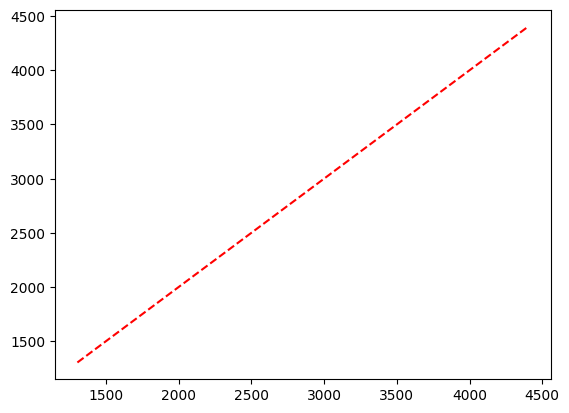

In [15]:
ax = sns.scatterplot(x=y_entrenar, y=y_prueba, alpha=0.5)
plt.plot([min(y_entrenar), max(y_entrenar)], [min(y_entrenar), max(y_entrenar)], 'r--', label='Ideal: Predicción = Real')

sdafsadfdsa